In [31]:
from swarm_explainer import SwarmExplainer 
import swarm_explainer

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

## Load dataset

In [32]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

X_backup = X.copy()
y_backup = y.copy()

X = swarm_explainer.explainer.preprocess(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Fitting models

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

model =  lr
print(">> Acc all: %.5f" % (accuracy_score(y_test, model.predict(X_test))))
print(">> Acc 0: %.5f" % (accuracy_score(y_test[y_test == 0], model.predict(X_test[y_test == 0]))))
print(">> Acc 1: %.5f" % (accuracy_score(y_test[y_test == 1], model.predict(X_test[y_test == 1]))))
print(">> Acc 2: %.5f" % (accuracy_score(y_test[y_test == 2], model.predict(X_test[y_test == 2]))))


>> Acc all: 1.00000
>> Acc 0: 1.00000
>> Acc 1: 1.00000
>> Acc 2: 1.00000


In [34]:
swarm = SwarmExplainer(max_it=100, N=10, m=X_test.shape[1], model=model, feature_names=feature_names, n_classes=len(np.unique(y)), verbose=True)

In [35]:
swarm.fit_transform(X_test, y_test)

  0%|          | 0/3 [00:00<?, ?it/s]

Finding feature weights for class 0...
Feature 1 => epoch 10/100
Feature 0 => epoch 10/100
Feature 2 => epoch 10/100
Feature 3 => epoch 10/100
Feature 2 => epoch 20/100
Feature 3 => epoch 20/100
Feature 1 => epoch 20/100
Feature 0 => epoch 20/100
Feature 3 => epoch 30/100
Feature 2 => epoch 30/100
Feature 1 => epoch 30/100
Feature 3 => epoch 40/100
Feature 0 => epoch 30/100
Feature 2 => epoch 40/100
Feature 3 => epoch 50/100
Feature 2 => epoch 50/100
Feature 1 => epoch 40/100
Feature 0 => epoch 40/100
Feature 3 => epoch 60/100
Feature 2 => epoch 60/100
Feature 3 => epoch 70/100
Feature 2 => epoch 70/100
Feature 1 => epoch 50/100
Feature 0 => epoch 50/100
Feature 3 => epoch 80/100
Feature 2 => epoch 80/100
Feature 1 => epoch 60/100
Feature 3 => epoch 90/100
Feature 0 => epoch 60/100
Feature 2 => epoch 90/100
Feature 3 => epoch 100/100
Done for feature 3.
Feature 2 => epoch 100/100
Done for feature 2.
Feature 1 => epoch 70/100
Feature 0 => epoch 70/100
Feature 1 => epoch 80/100
Feature 0

 33%|███▎      | 1/3 [00:20<00:41, 20.89s/it]


Finding feature weights for class 1...
Feature 1 => epoch 10/100
Feature 0 => epoch 10/100
Feature 3 => epoch 10/100
Feature 2 => epoch 10/100
Feature 1 => epoch 20/100
Feature 0 => epoch 20/100
Feature 1 => epoch 30/100
Feature 2 => epoch 20/100
Feature 3 => epoch 20/100
Feature 1 => epoch 40/100
Feature 0 => epoch 30/100
Feature 2 => epoch 30/100
Feature 3 => epoch 30/100
Feature 1 => epoch 50/100
Feature 1 => epoch 60/100
Feature 0 => epoch 40/100
Feature 2 => epoch 40/100
Feature 3 => epoch 40/100
Feature 1 => epoch 70/100
Feature 0 => epoch 50/100
Feature 2 => epoch 50/100
Feature 1 => epoch 80/100
Feature 3 => epoch 50/100
Feature 1 => epoch 90/100
Feature 0 => epoch 60/100
Feature 2 => epoch 60/100
Feature 1 => epoch 100/100
Feature 3 => epoch 60/100
Done for feature 1.
Feature 0 => epoch 70/100
Feature 2 => epoch 70/100
Feature 3 => epoch 70/100
Feature 0 => epoch 80/100
Feature 2 => epoch 80/100
Feature 3 => epoch 80/100
Feature 0 => epoch 90/100
Feature 2 => epoch 90/100
Fea

 67%|██████▋   | 2/3 [00:43<00:21, 21.38s/it]

Done for feature 3.
Done finding weights!
Now computing importances!

Finding feature weights for class 2...
Feature 1 => epoch 10/100
Feature 0 => epoch 10/100
Feature 3 => epoch 10/100
Feature 2 => epoch 10/100
Feature 1 => epoch 20/100
Feature 0 => epoch 20/100
Feature 3 => epoch 20/100
Feature 2 => epoch 20/100
Feature 1 => epoch 30/100
Feature 0 => epoch 30/100
Feature 3 => epoch 30/100
Feature 2 => epoch 30/100
Feature 1 => epoch 40/100
Feature 0 => epoch 40/100
Feature 2 => epoch 40/100
Feature 3 => epoch 40/100
Feature 1 => epoch 50/100
Feature 0 => epoch 50/100
Feature 2 => epoch 50/100
Feature 3 => epoch 50/100
Feature 1 => epoch 60/100
Feature 2 => epoch 60/100
Feature 0 => epoch 60/100
Feature 3 => epoch 60/100
Feature 1 => epoch 70/100
Feature 2 => epoch 70/100
Feature 0 => epoch 70/100
Feature 3 => epoch 70/100
Feature 1 => epoch 80/100
Feature 2 => epoch 80/100
Feature 0 => epoch 80/100
Feature 3 => epoch 80/100
Feature 2 => epoch 90/100
Feature 1 => epoch 90/100
Feature

100%|██████████| 3/3 [01:07<00:00, 22.54s/it]

Done for feature 1.
Feature 3 => epoch 100/100
Done for feature 0.
Done for feature 3.
Done finding weights!
Now computing importances!



C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\swarm_explainer\explainer.py:493: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


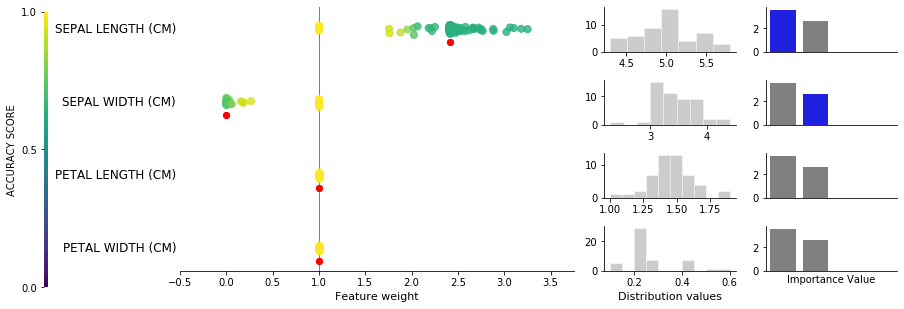

In [36]:
swarm.plot_importance(0, X_backup, y_backup, plot_execution=True, show_best=True)

C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\swarm_explainer\explainer.py:493: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


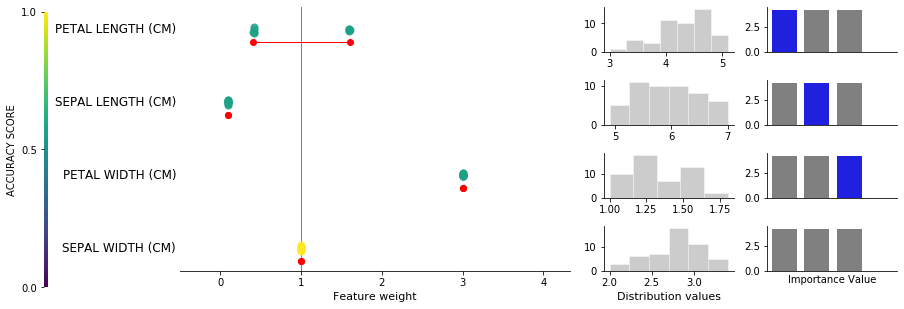

In [37]:
swarm.plot_importance(1, X_backup, y_backup, plot_execution=False, show_best=False)

C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wilso\Anaconda3\envs\ia-tools\lib\site-packages\swarm_explainer\explainer.py:493: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/figs/iris-class2.pdf'

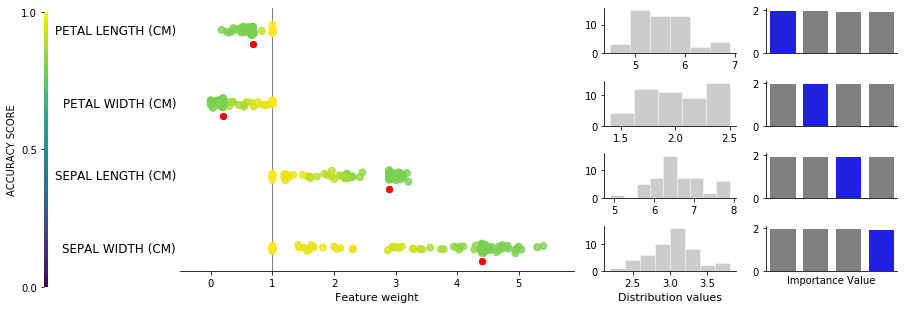

In [38]:
swarm.plot_importance(2, X_backup, y_backup, plot_execution=True, show_best=True, filepath='datasets/figs/iris-class2.pdf')

In [ ]:
swarm.important_features(klass=0)

,names,w,acc,importances
1,sepal width (cm),1.000000,0.366667,3.635538
2,petal length (cm),1.177908,0.366667,3.630000
0,sepal length (cm),0.000000,0.000000,0.000000
3,petal width (cm),0.000000,0.000000,0.000000


In [ ]:
swarm.important_features()

,names,importances
0,petal length (cm),9.945844
3,sepal width (cm),8.255538
1,petal width (cm),6.295298
2,sepal length (cm),6.289201
